In [3]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates
from main import *

pi_9300_LH = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Port Isabel\PortIsabel_1993-2000_pwl_harmwl_bwl.csv')
pi_9300_LH.drop(labels=range(701280,701286),axis = 0, inplace = True)
pi_0112_LH = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Port Isabel\PortIsabel_2001-2012_pwl_harmwl_bwl.csv')
pi_0112_LH.drop(labels=range(1051920,1051926), axis = 0, inplace=True)
pi_1323_LH = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Port Isabel\PortIsabel_2013-2023_pwl_harmwl_bwl.csv')
pi_1323_LH.drop(labels=range(len(pi_1323_LH)-6,len(pi_1323_LH)), axis=0, inplace=True)
directory_path = r'C:\Users\mrpro\Documents\Code\CBI\data 2\NOAA\portIsabel'

dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

pi_NOAA = pd.concat(dataframes, ignore_index=True)
pi_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
pi_NOAA.reset_index(drop = True, inplace=True)
frames = [pi_9300_LH,pi_0112_LH,pi_1323_LH]
pi_LH = pd.concat(frames, ignore_index=True)
pi_LH.drop(labels=range(0,262800),axis=0, inplace=True)
pi_LH.reset_index(drop=True, inplace=True)

comparison_df = pd.DataFrame()
comparison_df['Dates'] = pi_LH['#date+time']
comparison_df['Lighthouse WL'] = pi_LH['018-pwl']
comparison_df['NOAA WL'] = pi_NOAA[' Water Level']

comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')

PI_2007 = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\07-08-nes-recreate-output-pt2\ptisab-2007001-output.csv')
#PI_2007 = pd.read_csv(r'/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/port-isabel-2007-output.csv')
PI_2008 = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\07-08-nes-recreate-output-pt2\ptisab-2008001-output.csv')
#PI_2008 = pd.read_csv(r'/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/port-isabel-2007-output.csv')
PI_2007.reset_index(drop = True, inplace=True)
PI_2008.reset_index(drop = True, inplace=True)
PI_2007.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
PI_2007['Dates'] = pd.to_datetime(PI_2007['Date'])
PI_2007['Water Level'] = pd.to_numeric(PI_2007['Water Level'], errors='coerce')
PI_2008.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
PI_2008['Dates'] = pd.to_datetime(PI_2008['Date'])
PI_2008['Water Level'] = pd.to_numeric(PI_2008['Water Level'], errors='coerce')
PI = pd.concat([PI_2007,PI_2008],ignore_index=True)

total_df = PI.merge(comparison_df,on='Dates',how='outer')
total_df = total_df.drop(columns='Station #',axis=0)
total_df = total_df.drop(columns='Date',axis=0)
total_df['NES WL'] = total_df["Water Level"]


C:\Users\mrpro\AppData\Local\Temp\ipykernel_10380\3771913534.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  pi_9300_LH = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Port Isabel\PortIsabel_1993-2000_pwl_harmwl_bwl.csv')
C:\Users\mrpro\AppData\Local\Temp\ipykernel_10380\3771913534.py:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pi_0112_LH = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Port Isabel\PortIsabel_2001-2012_pwl_harmwl_bwl.csv')
C:\Users\mrpro\AppData\Local\Temp\ipykernel_10380\3771913534.py:16: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  pi_1323_LH = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Port Isabel\PortIsabel_2013-2023_pwl_harmwl_bwl.csv')
C:\Users\mrpro\AppData\Local\Temp\ipykernel_10380\3771913534.py:47: FutureWarning: A valu

In [4]:
total_df

,Water Level,Dates,Lighthouse WL,NOAA WL,NES WL
0,NaN,1996-01-01 00:00:00,1.669,1.669,NaN
1,NaN,1996-01-01 00:06:00,1.668,1.668,NaN
2,NaN,1996-01-01 00:12:00,1.656,1.656,NaN
3,NaN,1996-01-01 00:18:00,1.643,1.643,NaN
4,NaN,1996-01-01 00:24:00,1.636,1.636,NaN
...,...,...,...,...,...
2454488,NaN,2023-12-31 23:30:00,1.440,1.445,NaN
2454489,NaN,2023-12-31 23:36:00,1.445,1.451,NaN
2454490,NaN,2023-12-31 23:42:00,1.451,1.458,NaN
2454491,NaN,2023-12-31 23:48:00,1.458,1.464,NaN


Text(0.5, 1.0, 'Port Isabel Correction 1')

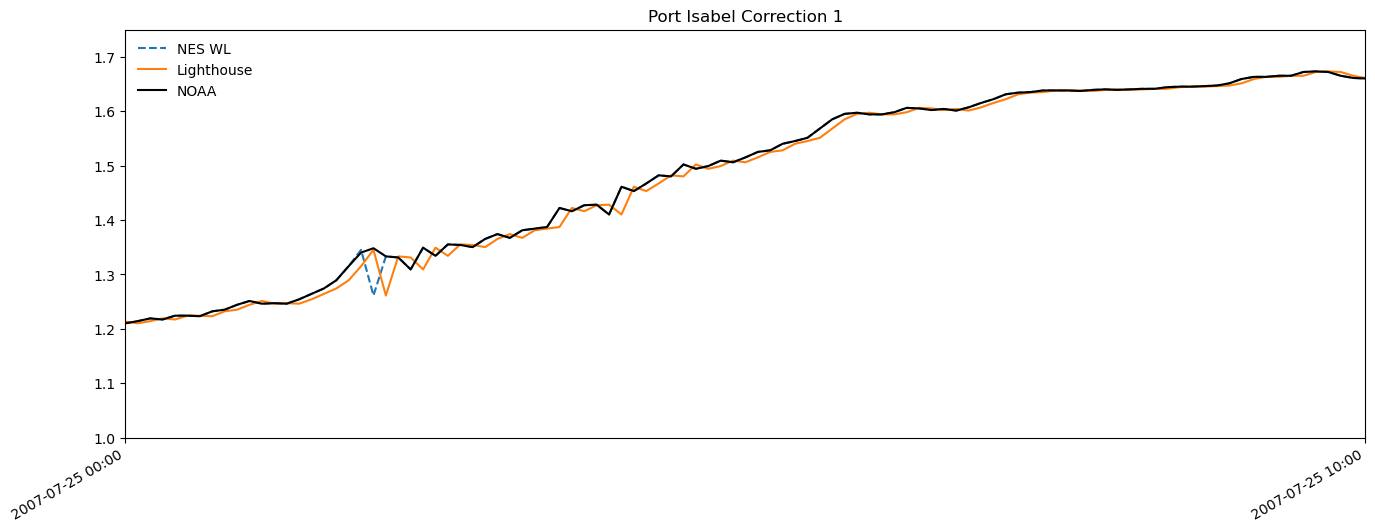

In [5]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1,1.75)

start_date = pd.to_datetime('2007-07-25 00:00')

end_date = pd.to_datetime('2007-07-25 10:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Port Isabel Correction 1')

Text(0.5, 1.0, 'Port Isabel Correction 2')

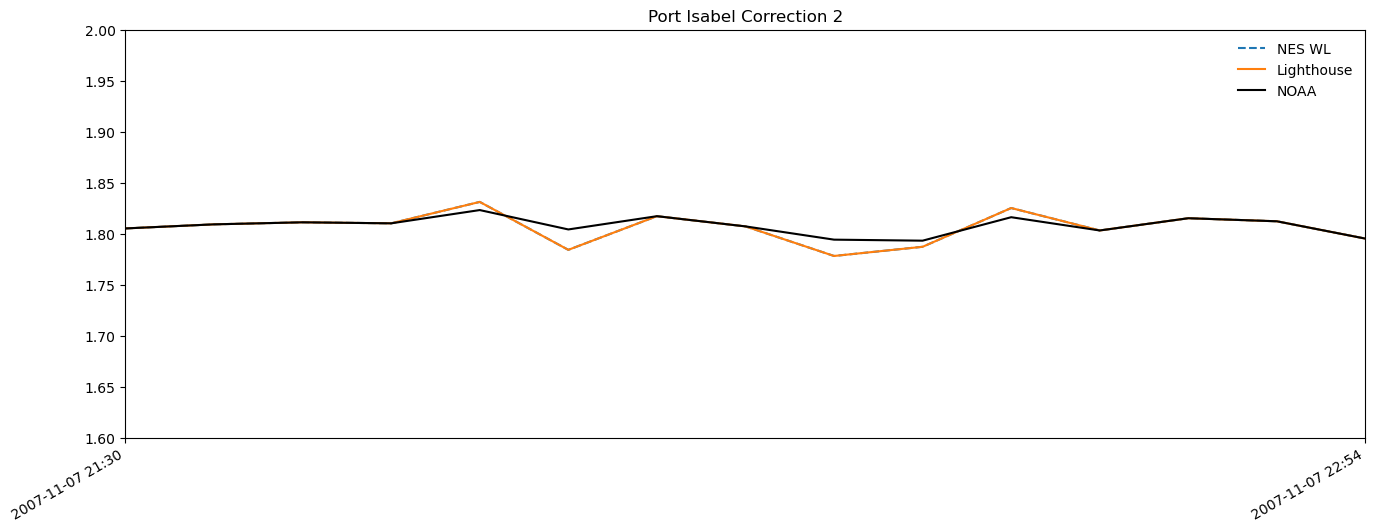

In [6]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.6,2)

start_date = pd.to_datetime('2007-11-07 21:30')

end_date = pd.to_datetime('2007-11-07 22:54')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Port Isabel Correction 2')

Text(0.5, 1.0, 'Port Isabel Correction 4')

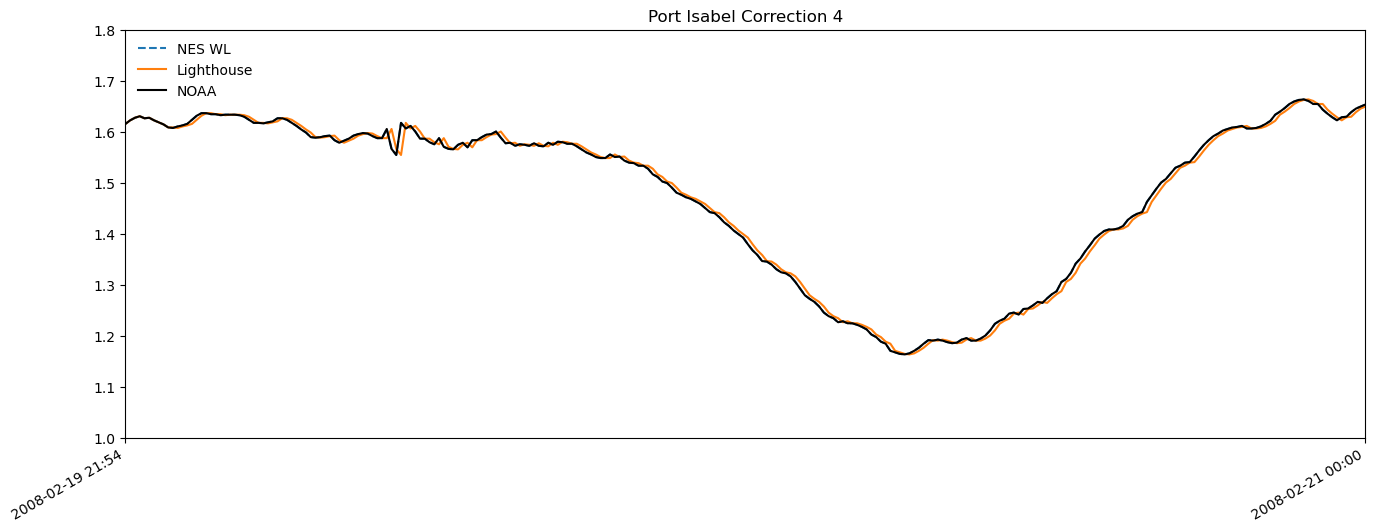

In [7]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1,1.8)

start_date = pd.to_datetime('2008-02-19 21:54')

end_date = pd.to_datetime('2008-02-21 00:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Port Isabel Correction 4')

Text(0.5, 1.0, 'Port Isabel Correction 5')

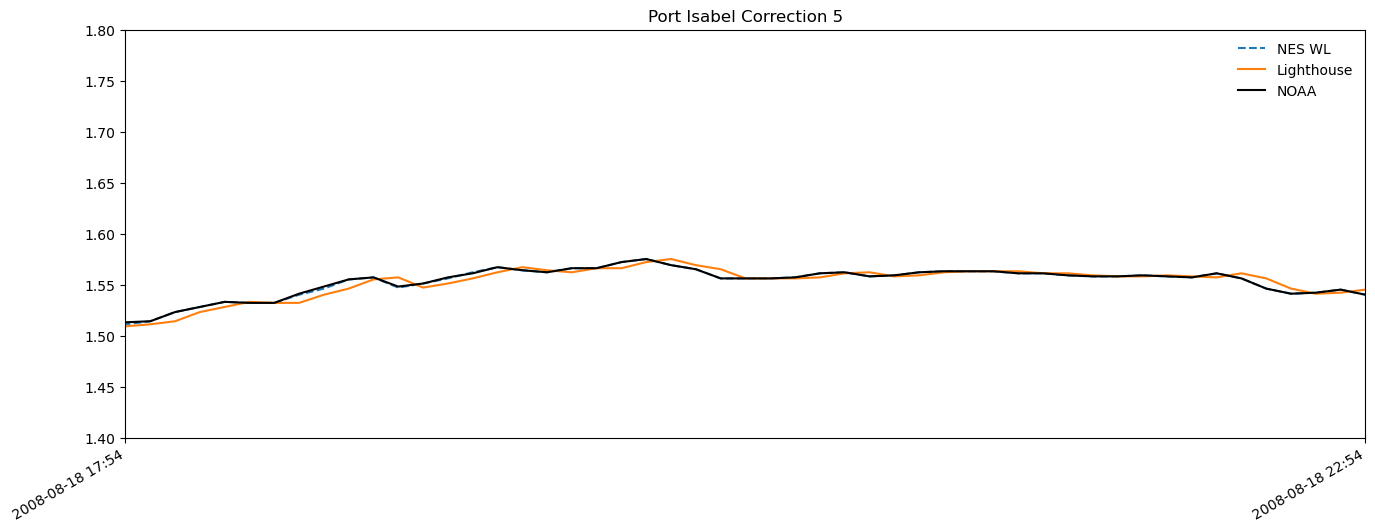

In [8]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.4,1.8)

start_date = pd.to_datetime('2008-08-18 17:54')

end_date = pd.to_datetime('2008-08-18 22:54')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Port Isabel Correction 5')

Text(0.5, 1.0, 'Port Isabel Correction 6')

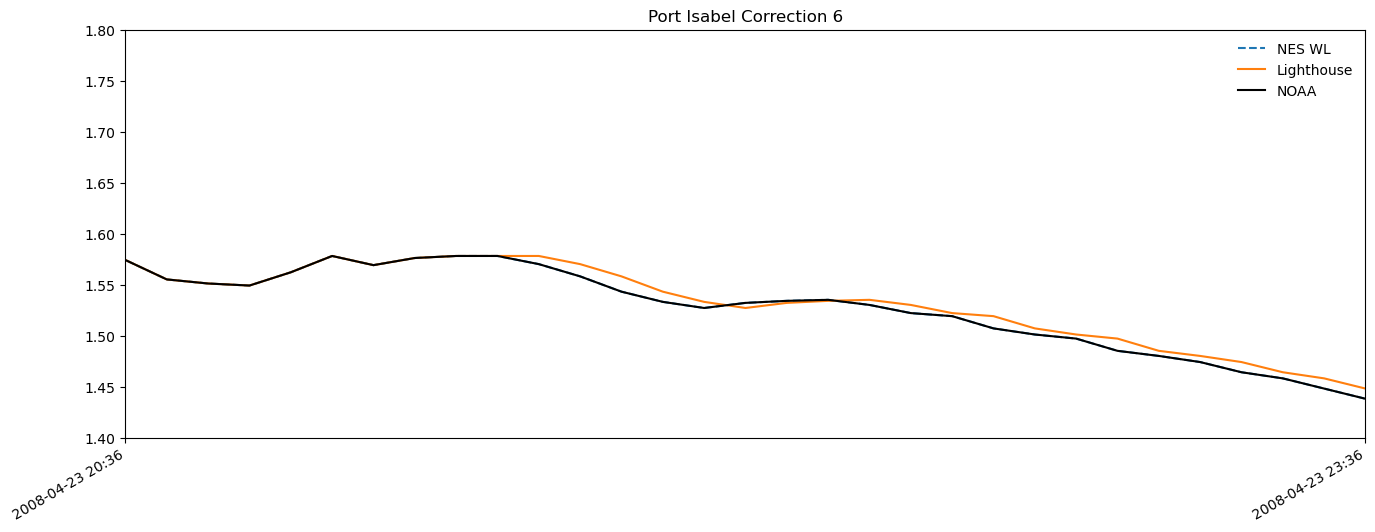

In [9]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.4,1.8)

start_date = pd.to_datetime('2008-04-23 20:36')

end_date = pd.to_datetime('2008-04-23 23:36')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Port Isabel Correction 6')

In [10]:
disagreements(total_df)


0.3208836554518874

Text(0.5, 1.0, 'Port Isabel Correction check')

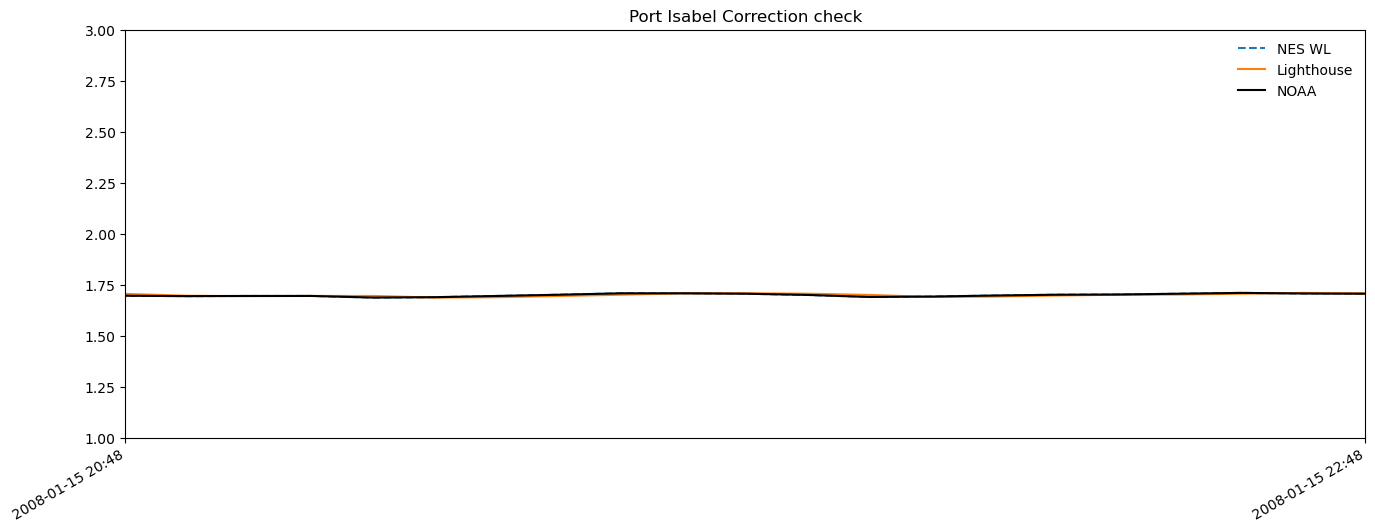

In [11]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1,3)

start_date = pd.to_datetime('1/15/2008 20:48')

end_date = pd.to_datetime('1/15/2008 22:48')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Port Isabel Correction check')

Text(0.5, 1.0, 'Port Isabel Issue 1')

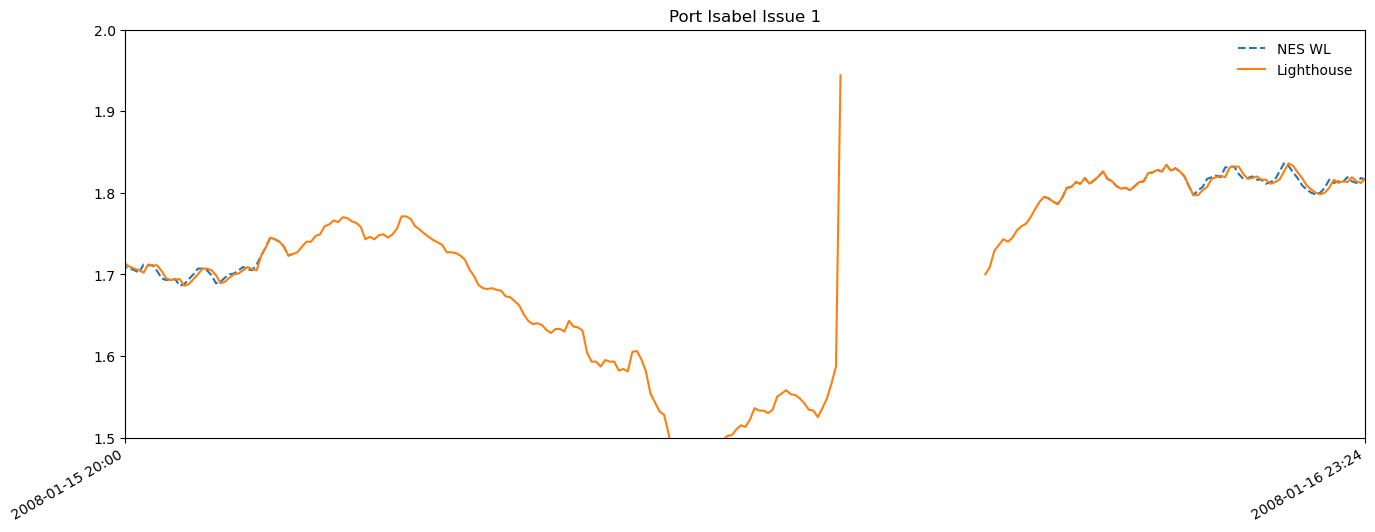

In [12]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

#plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,2)

start_date = pd.to_datetime('1/15/2008 20:00')

end_date = pd.to_datetime('1/16/2008 23:24')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Port Isabel Issue 1')

Text(0.5, 1.0, 'Port Isabel Missing Data 2')

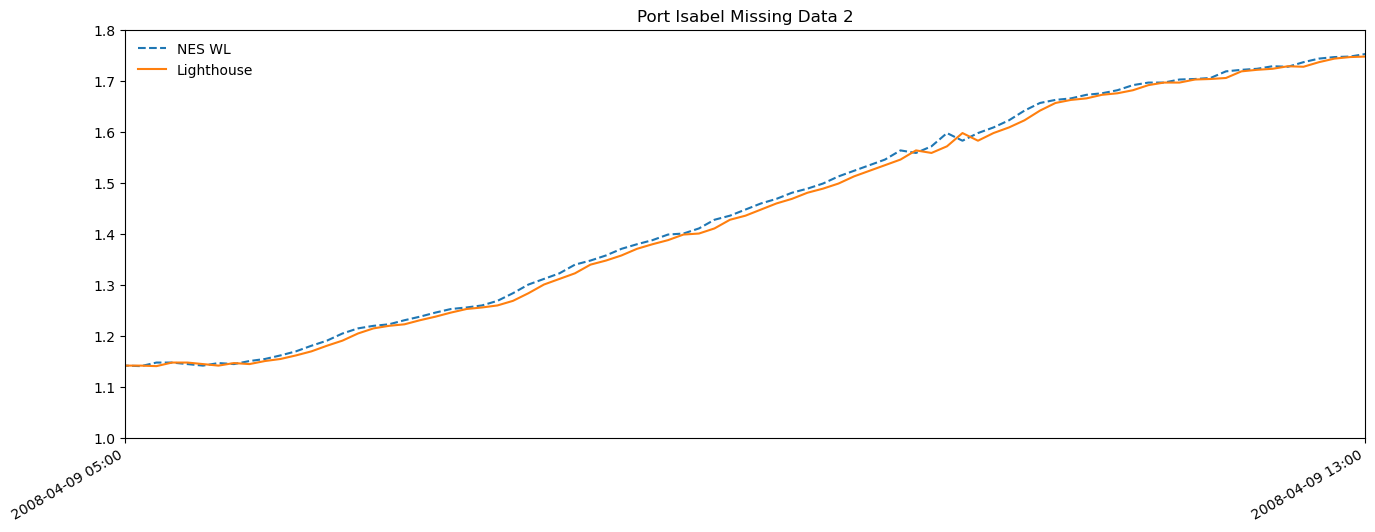

In [13]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

#plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1,1.8)

start_date = pd.to_datetime('4/9/2008 05:00')

end_date = pd.to_datetime('4/9/2008 13:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Port Isabel Missing Data 2')

Text(0.5, 1.0, 'Port Isabel Missing Data 3')

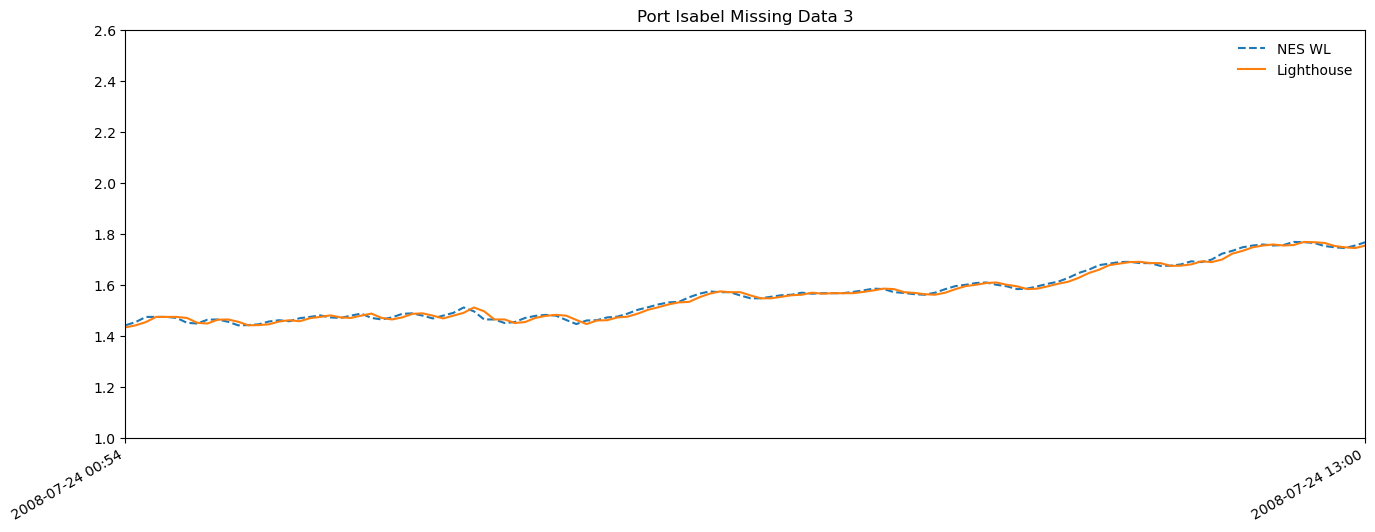

In [14]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

#plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1,2.6)

start_date = pd.to_datetime('7/24/2008 00:54')

end_date = pd.to_datetime('7/24/2008 13:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Port Isabel Missing Data 3')

Text(0.5, 1.0, 'Port Isabel Issue')

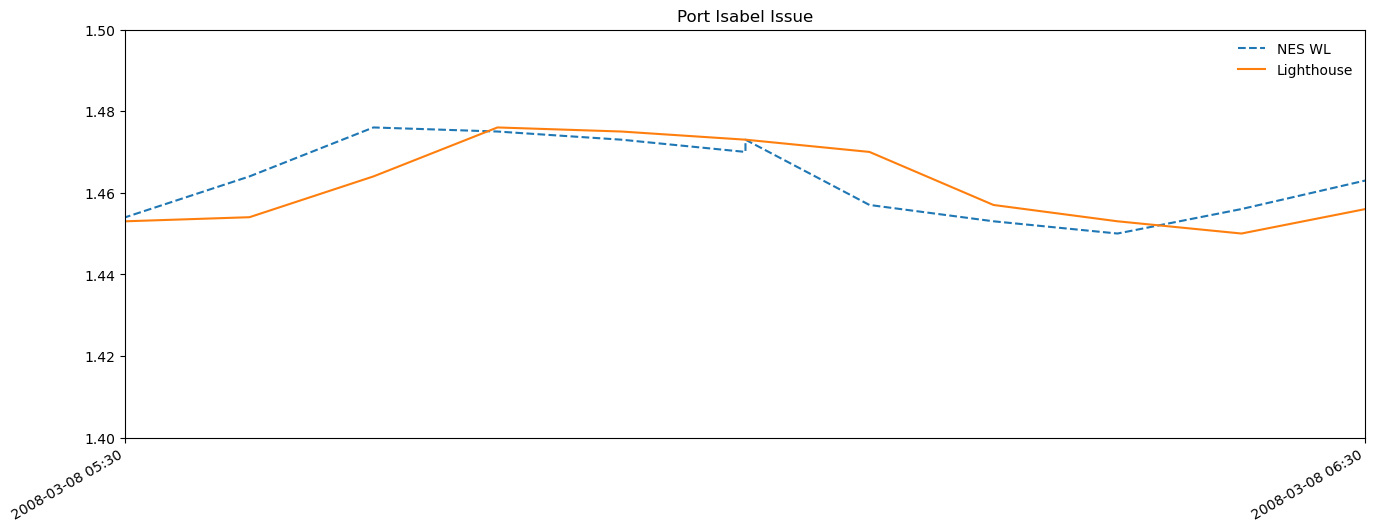

In [15]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

#plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.4,1.5)

start_date = pd.to_datetime('3/8/2008 5:30')

end_date = pd.to_datetime('3/8/2008 6:30')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Port Isabel Issue')